# VacationPy
----

#### Note
* Keep an eye on your API usage. Use https://developers.google.com/maps/reporting/gmp-reporting as reference for how to monitor your usage and billing.

* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [124]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os

# Import API key
from api_keys import g_key

### Store Part I results into DataFrame
* Load the csv exported in Part I to a DataFrame

In [3]:
study_results_path = "C:\\Users\\oorte\\Documents\\RICE-CLASS-MATERIAL\\API-challenge\\output\\cities.csv"

# Read the data 
df = pd.read_csv(study_results_path)



In [4]:
df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saskylakh,71.92,114.08,-21.55,84,100,18.68,RU,1607890760
1,carnarvon,-24.87,113.63,68.00,72,40,18.34,AU,1607890732
2,hithadhoo,-0.60,73.08,82.36,77,50,15.37,MV,1607890729
3,butaritari,3.07,172.79,81.45,76,7,14.67,KI,1607890737
4,hilo,19.73,-155.09,77.00,78,90,3.36,US,1607890488
...,...,...,...,...,...,...,...,...,...
542,san patricio,28.02,-97.52,82.00,61,75,16.11,US,1607890742
543,jumla,29.27,82.18,33.31,48,0,4.47,NP,1607890743
544,peniche,39.36,-9.38,61.00,92,100,7.00,PT,1607890785
545,laizhou,37.17,119.92,25.93,85,60,13.53,CN,1607891032


In [5]:
# The first requirement is to create a series of scatter plots to showcase the following relationships:

yl=df['Lat']
xt=df['Max Temp']
xh=df['Humidity']
xc=df['Cloudiness']
xw=df['Wind Speed']

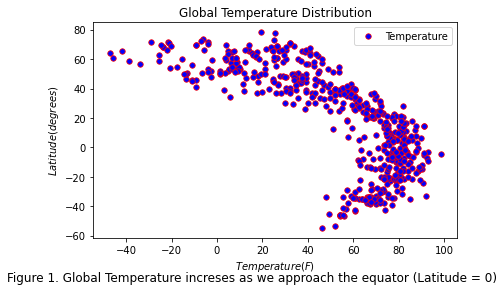

In [137]:
## Temperature vs. Latitude:
plt.plot(xt, yl, ls="", marker="o", markersize=5.5, markeredgewidth=0.75, markeredgecolor="red", markerfacecolor="blue", label="Temperature")
plt.legend(numpoints=1)
plt.xlabel("$Temperature (F)$")
plt.ylabel("$Latitude (degrees)$")
plt.title('Global Temperature Distribution')
txt="Figure 1. Global Temperature increses as we approach the equator (Latitude = 0)"
plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
plt.tight_layout()
plt.show()

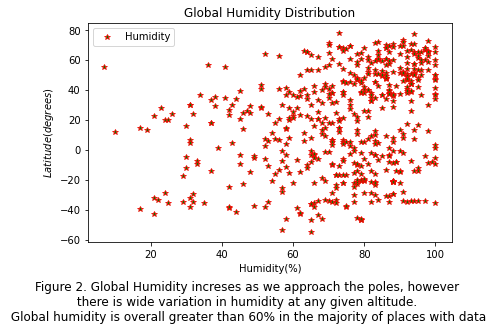

In [147]:
# * Humidity (%) vs. Latitude
plt.plot(xh, yl, ls="", marker="*", markersize=5.5, markeredgewidth=0.75, markeredgecolor="red", markerfacecolor="green", label="Humidity")
plt.legend(numpoints=1)
plt.xlabel("Humidity(%)")
plt.ylabel("$Latitude (degrees)$")
plt.title('Global Humidity Distribution')
txt1="Figure 2. Global Humidity increses as we approach the poles, however"
txt2="\n there is wide variation in humidity at any given altitude. "
txt3="\n Global humidity is overall greater than 60% in the majority of places with data"
plt.figtext(0.5, -0.12, txt1+txt2+txt3, wrap=True, horizontalalignment='center', fontsize=12)
plt.tight_layout()
plt.show()

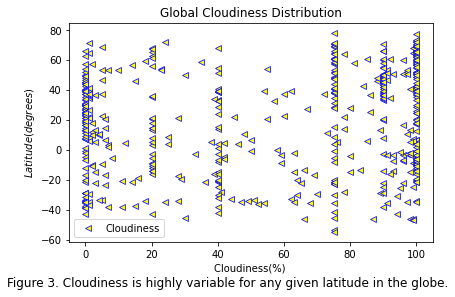

In [149]:
# * Cloudiness (%) vs. Latitude
plt.plot(xc, yl, ls="", marker="<", markersize=5.5, markeredgewidth=0.75, markeredgecolor="blue", markerfacecolor="yellow", label="Cloudiness")
plt.legend(numpoints=1)
plt.xlabel("Cloudiness(%) ")
plt.ylabel("$Latitude (degrees)$")
plt.title('Global Cloudiness Distribution')
txt1="Figure 3. Cloudiness is highly variable for any given latitude in the globe."
plt.figtext(0.5, -0.01, txt1, wrap=True, horizontalalignment='center', fontsize=12)
plt.tight_layout()
plt.show()

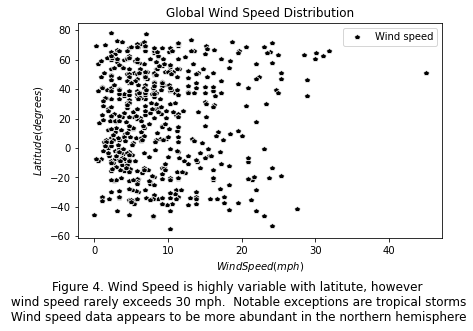

In [151]:
# * Wind Speed (mph) vs. Latitude
plt.plot(xw, yl, ls="", marker="p", markersize=5.5, markeredgewidth=0.75, markeredgecolor="white", markerfacecolor="black", label="Wind speed")
plt.legend(numpoints=1)
plt.xlabel("$Wind Speed (mph)$")
plt.ylabel("$Latitude (degrees)$")
plt.title('Global Wind Speed Distribution')
txt1="Figure 4. Wind Speed is highly variable with latitute, however"
txt2="\n wind speed rarely exceeds 30 mph.  Notable exceptions are tropical storms."
txt3="\n Wind speed data appears to be more abundant in the northern hemisphere"
plt.figtext(0.5, -0.12, txt1+txt2+txt3, wrap=True, horizontalalignment='center', fontsize=12)
plt.tight_layout()
plt.show()

#After each plot, add a sentence or two explaining what the code is analyzing.

In [125]:
# The second requirement is to run linear regression on each relationship. This time, separate the plots into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere (less than 0 degrees latitude):
from scipy import stats 
dfn=df.loc[df['Lat']>=0]
dfs=df.loc[df['Lat']<0]

In [126]:
yln=dfn['Lat']
yls=dfs['Lat']
xtn=dfn['Max Temp']
xhn=dfn['Humidity']
xcn=dfn['Cloudiness']
xwn=dfn['Wind Speed']
xts=dfs['Max Temp']
xhs=dfs['Humidity']
xcs=dfs['Cloudiness']
xws=dfs['Wind Speed']

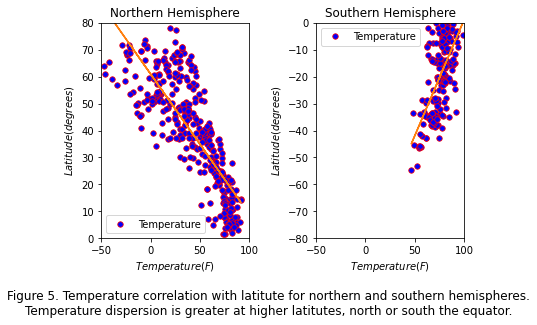

In [168]:
# * Northern Hemisphere - Temperature (F) vs. Latitude
# * Southern Hemisphere - Temperature (F) vs. Latitude

plt.subplot(1,2,1)
plt.plot(xtn, yln, ls="", marker="o", markersize=5.5, markeredgewidth=0.75, markeredgecolor="red", markerfacecolor="blue", label="Temperature")
plt.legend(numpoints=1)
plt.xlim(-50,100)
plt.ylim(0,80)
plt.xlabel("$Temperature (F)$")
plt.ylabel("$Latitude (degrees)$")
plt.title('Northern Hemisphere')
slope, intercept, r_value, p_value, std_err = stats.linregress(xtn,yln)
plt.plot(xtn, slope*xtn + intercept)
plt.tight_layout()

plt.subplot(1,2,2)
plt.plot(xts, yls, ls="", marker="o", markersize=5.5, markeredgewidth=0.75, markeredgecolor="red", markerfacecolor="blue", label="Temperature")
plt.legend(numpoints=1)
plt.xlim(-50,100)
plt.ylim(-80,0)
plt.xlabel("$Temperature (F)$")
plt.ylabel("$Latitude (degrees)$")
plt.title('Southern Hemisphere')
slope, intercept, r_value, p_value, std_err = stats.linregress(xts,yls)
plt.plot(xts, slope*xts + intercept)
plt.tight_layout()

txt1="Figure 5. Temperature correlation with latitute for northern and southern hemispheres."
txt2="\nTemperature dispersion is greater at higher latitutes, north or south the equator."
txt3="\nTemperature data is very scarse at latitudes higher than 50 degrees south"
plt.figtext(0.5, -0.1, txt1+txt2, wrap=True, horizontalalignment='center', fontsize=12)

plt.show()

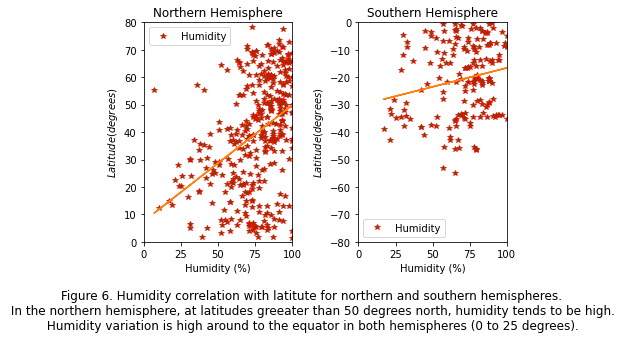

In [170]:
# * Northern Hemisphere - Humidity (%) vs. Latitude
# * Southern Hemisphere - Humidity (%) vs. Latitude
plt.subplot(1,2,1)
plt.plot(xhn, yln, ls="", marker="*", markersize=5.5, markeredgewidth=0.75, markeredgecolor="red", markerfacecolor="green", label="Humidity")
plt.legend(numpoints=1)
plt.xlim(0,100)
plt.ylim(0,80)
plt.xlabel("Humidity (%)")
plt.ylabel("$Latitude (degrees)$")
plt.title('Northern Hemisphere')
slope, intercept, r_value, p_value, std_err = stats.linregress(xhn,yln)
plt.plot(xhn, slope*xhn + intercept)
plt.tight_layout()

plt.subplot(1,2,2)
plt.plot(xhs, yls, ls="", marker="*", markersize=5.5, markeredgewidth=0.75, markeredgecolor="red", markerfacecolor="green", label="Humidity")
plt.legend(numpoints=1)
plt.xlim(0,100)
plt.ylim(-80,0)
plt.xlabel("Humidity (%)")
plt.ylabel("$Latitude (degrees)$")
plt.title('Southern Hemisphere')
slope, intercept, r_value, p_value, std_err = stats.linregress(xhs,yls)
plt.plot(xhs, slope*xhs + intercept)
plt.tight_layout()

txt1="Figure 6. Humidity correlation with latitute for northern and southern hemispheres."
txt2="\n In the northern hemisphere, at latitudes greeater than 50 degrees north, humidity tends to be high."
txt3="\n Humidity variation is high around to the equator in both hemispheres (0 to 25 degrees)."
plt.figtext(0.5, -0.15, txt1+txt2+txt3, wrap=True, horizontalalignment='center', fontsize=12)

plt.show()

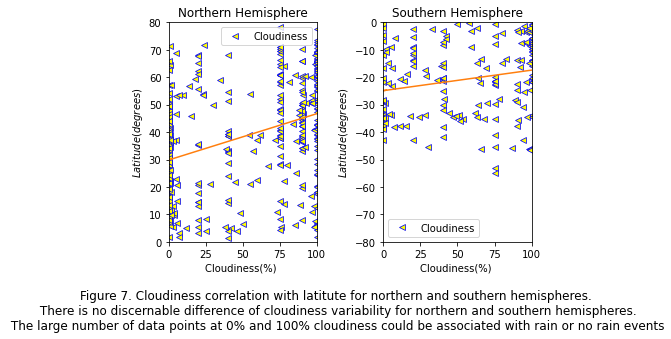

In [171]:
# * Northern Hemisphere - Cloudiness (%) vs. Latitude
# * Southern Hemisphere - Cloudiness (%) vs. Latitude
plt.subplot(1,2,1)

plt.plot(xcn, yln, ls="", marker="<", markersize=5.5, markeredgewidth=0.75, markeredgecolor="blue", markerfacecolor="yellow", label="Cloudiness")
plt.legend(numpoints=1)
plt.xlim(0,100)
plt.ylim(0,80)
plt.xlabel("Cloudiness(%) ")
plt.ylabel("$Latitude (degrees)$")
plt.title('Northern Hemisphere')
slope, intercept, r_value, p_value, std_err = stats.linregress(xcn,yln)
plt.plot(xcn, slope*xcn + intercept)
plt.tight_layout()

plt.subplot(1,2,2)
plt.plot(xcs, yls, ls="", marker="<", markersize=5.5, markeredgewidth=0.75, markeredgecolor="blue", markerfacecolor="yellow", label="Cloudiness")
plt.legend(numpoints=1)
plt.xlim(0,100)
plt.ylim(-80,0)
plt.xlabel("Cloudiness(%) ")
plt.ylabel("$Latitude (degrees)$")
plt.title('Southern Hemisphere')
slope, intercept, r_value, p_value, std_err = stats.linregress(xcs,yls)
plt.plot(xcn, slope*xcn + intercept)
plt.tight_layout()

txt1="Figure 7. Cloudiness correlation with latitute for northern and southern hemispheres."
txt2="\n There is no discernable difference of cloudiness variability for northern and southern hemispheres."
txt3="\n The large number of data points at 0% and 100% cloudiness could be associated with rain or no rain events"
plt.figtext(0.5, -0.15, txt1+txt2+txt3, wrap=True, horizontalalignment='center', fontsize=12)

plt.show()


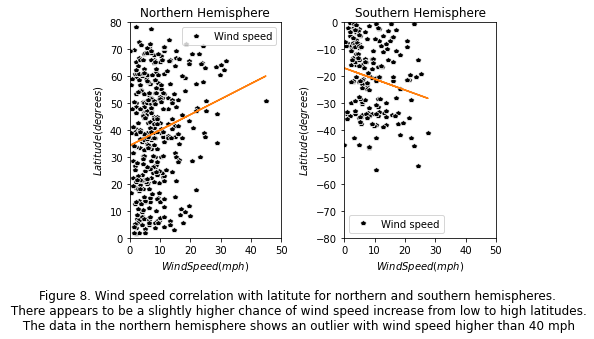

In [173]:
# * Northern Hemisphere - Wind Speed (mph) vs. Latitude
# * Southern Hemisphere - Wind Speed (mph) vs. Latitude
plt.subplot(1,2,1)
plt.plot(xwn, yln, ls="", marker="p", markersize=5.5, markeredgewidth=0.75, markeredgecolor="white", markerfacecolor="black", label="Wind speed")
plt.legend(numpoints=1)
plt.xlim(0,50)
plt.ylim(0,80)
plt.xlabel("$Wind Speed (mph)$")
plt.ylabel("$Latitude (degrees)$")
plt.title('Northern Hemisphere')
slope, intercept, r_value, p_value, std_err = stats.linregress(xwn,yln)
plt.plot(xwn, slope*xwn + intercept)
plt.tight_layout()


plt.subplot(1,2,2)
plt.plot(xws, yls, ls="", marker="p", markersize=5.5, markeredgewidth=0.75, markeredgecolor="white", markerfacecolor="black", label="Wind speed")
plt.legend(numpoints=1)
plt.xlim(0,50)
plt.ylim(-80,0)
plt.xlabel("$Wind Speed (mph)$")
plt.ylabel("$Latitude (degrees)$")
plt.title('Southern Hemisphere')
slope, intercept, r_value, p_value, std_err = stats.linregress(xws,yls)
plt.plot(xws, slope*xws + intercept)
plt.tight_layout()

txt1="Figure 8. Wind speed correlation with latitute for northern and southern hemispheres."
txt2="\n There appears to be a slightly higher chance of wind speed increase from low to high latitudes."
txt3="\n The data in the northern hemisphere shows an outlier with wind speed higher than 40 mph"
plt.figtext(0.5, -0.15, txt1+txt2+txt3, wrap=True, horizontalalignment='center', fontsize=12)

plt.show()

In [ ]:
# After each pair of plots, take the time to explain what the linear regression is modeling. 
# For example, describe any relationships you notice and any other analysis you may have.

In [ ]:
# Your final notebook must:

# * Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
# * Perform a weather check on each of the cities using a series of successive API calls.
# * Include a print log of each city as it's being processed with the city number and city name.
# * Save a CSV of all retrieved data and a PNG image for each scatter plot.

### Humidity Heatmap
* Configure gmaps.
* Use the Lat and Lng as locations and Humidity as the weight.
* Add Heatmap layer to map.

In [56]:
# Access maps with unique API key
gmaps.configure(api_key=g_key)

In [57]:
# Store latitude and longitude in locations
locations = df[["Lat", "Lng"]]

# Fill NaN values and convert to float
Humidity = df["Humidity"].astype(float)
#Humidity

In [58]:
# Plot Heatmap
fig = gmaps.figure()

In [59]:
# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=Humidity, 
                                 dissipating=True, max_intensity=10,
                                 point_radius=5)

In [60]:
# Add layer
fig.add_layer(heat_layer)

In [61]:
# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

#https://gyazo.com/0e56a50e70a962479085fba67f928757
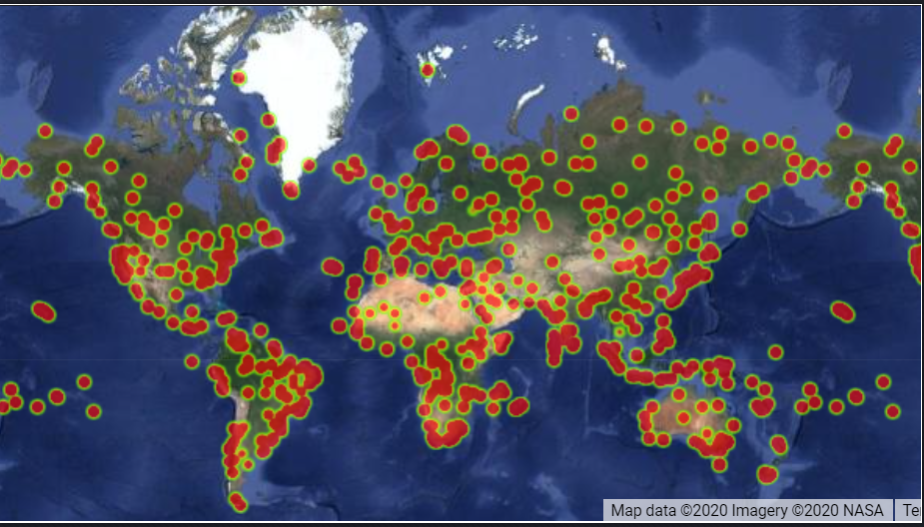

### Create new DataFrame fitting weather criteria
* Narrow down the cities to fit weather conditions.
* Drop any rows will null values.

In [84]:
# Create variable with TRUE if cloudiness is zero
cloudiness = df['Cloudiness'] == 0


In [85]:
# Create variable with TRUE for temperature, wind ideal condition
notcold = df['Max Temp'] > 70


In [86]:
nothot = df['Max Temp'] < 80


In [87]:
notwindy=df['Wind Speed']<10


In [66]:
# Select all cases that meet all conditions
#MyCities_df[
MyCities=df[cloudiness & notcold & nothot & notwindy]
MyCities

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
96,gunjur,13.20,-16.73,73.40,83,0,4.70,GM,1607890959
99,inongo,-1.95,18.27,73.56,82,0,2.80,CD,1607890959
117,todos santos,23.45,-110.22,73.00,62,0,4.00,MX,1607890962
192,mattru,7.62,-11.83,75.72,94,0,4.09,SL,1607890975
291,seddon,-37.81,144.89,72.00,52,0,9.17,AU,1607890990
375,guerrero negro,27.98,-114.06,72.09,23,0,9.10,MX,1607890749
435,gat,31.61,34.76,72.00,68,0,1.12,IL,1607890758
447,mecca,21.43,39.83,75.02,60,0,2.28,SA,1607890663
522,impfondo,1.64,18.07,74.03,87,0,1.41,CG,1607891027
541,abu dhabi,24.47,54.37,71.96,53,0,8.63,AE,1607890733


### Hotel Map
* Store into variable named `hotel_df`.
* Add a "Hotel Name" column to the DataFrame.
* Set parameters to search for hotels with 5000 meters.
* Hit the Google Places API for each city's coordinates.
* Store the first Hotel result into the DataFrame.
* Plot markers on top of the heatmap.

In [67]:
# Select all cases that meet all conditions
hotel_df=MyCities


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
96,gunjur,13.20,-16.73,73.40,83,0,4.70,GM,1607890959
99,inongo,-1.95,18.27,73.56,82,0,2.80,CD,1607890959
117,todos santos,23.45,-110.22,73.00,62,0,4.00,MX,1607890962
192,mattru,7.62,-11.83,75.72,94,0,4.09,SL,1607890975
291,seddon,-37.81,144.89,72.00,52,0,9.17,AU,1607890990
375,guerrero negro,27.98,-114.06,72.09,23,0,9.10,MX,1607890749
435,gat,31.61,34.76,72.00,68,0,1.12,IL,1607890758
447,mecca,21.43,39.83,75.02,60,0,2.28,SA,1607890663
522,impfondo,1.64,18.07,74.03,87,0,1.41,CG,1607891027
541,abu dhabi,24.47,54.37,71.96,53,0,8.63,AE,1607890733


In [68]:
hotel_df=hotel_df.assign(Hotel_Name = np.nan)
hotel_df.index = range(len(hotel_df.index))
hotel_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Hotel_Name
0,gunjur,13.20,-16.73,73.40,83,0,4.70,GM,1607890959,NaN
1,inongo,-1.95,18.27,73.56,82,0,2.80,CD,1607890959,NaN
2,todos santos,23.45,-110.22,73.00,62,0,4.00,MX,1607890962,NaN
3,mattru,7.62,-11.83,75.72,94,0,4.09,SL,1607890975,NaN
4,seddon,-37.81,144.89,72.00,52,0,9.17,AU,1607890990,NaN
5,guerrero negro,27.98,-114.06,72.09,23,0,9.10,MX,1607890749,NaN
6,gat,31.61,34.76,72.00,68,0,1.12,IL,1607890758,NaN
7,mecca,21.43,39.83,75.02,60,0,2.28,SA,1607890663,NaN
8,impfondo,1.64,18.07,74.03,87,0,1.41,CG,1607891027,NaN
9,abu dhabi,24.47,54.37,71.96,53,0,8.63,AE,1607890733,NaN


In [69]:
#latlong="13.20, -16.73"

In [70]:
# params = {
#     "location": "latlong",  # one city
#     "rankby": "distance",
#     "type": "hotel",
#     "key": g_key,
# }

In [71]:
import json
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
type='country'


In [72]:
#iterate through dataframe cities
for row in range(len(hotel_df)):

    # get city from df
    Cityx = hotel_df.iloc[row,0]
    print(Cityx)
    
    # url variable store url 
    url = "https://maps.googleapis.com/maps/api/place/textsearch/json?"
  
    # The text string on which to search 
    query = f'Hotels in {Cityx}'
    query

        # get method of requests module 
    # return response object 
    r = requests.get(url + 'query=' + query +
                        '&key=' + g_key) 
    r
      
    # json method of response object convert 
    #  json format data into python format data 
    x = r.json() 
  
    # now x contains list of nested dictionaries 
    # we know dictionary contain key value pair 
    # store the value of result key in variable y 
    y = x['results'] 

    hotel_df['Hotel_Name'][row]=y[0]['name']

gunjur


<ipython-input-72-89e209e756ca>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel_df['Hotel_Name'][row]=y[0]['name']
C:\Users\oorte\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


inongo
todos santos
mattru
seddon
guerrero negro
gat
mecca
impfondo
abu dhabi


In [73]:
df2=hotel_df
df2

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Hotel_Name
0,gunjur,13.20,-16.73,73.40,83,0,4.70,GM,1607890959,Radisson Blu Bengaluru Outer Ring Road
1,inongo,-1.95,18.27,73.56,82,0,2.80,CD,1607890959,Hotel Du Lac
2,todos santos,23.45,-110.22,73.00,62,0,4.00,MX,1607890962,Hotel San Cristóbal
3,mattru,7.62,-11.83,75.72,94,0,4.09,SL,1607890975,Kobeibu Village
4,seddon,-37.81,144.89,72.00,52,0,9.17,AU,1607890990,Plough Hotel
5,guerrero negro,27.98,-114.06,72.09,23,0,9.10,MX,1607890749,Hotel TerraSal
6,gat,31.61,34.76,72.00,68,0,1.12,IL,1607890758,Holiday Inn Houston SW - Sugar Land Area
7,mecca,21.43,39.83,75.02,60,0,2.28,SA,1607890663,Hotel Fairmont Makkah Clock Royal Tower
8,impfondo,1.64,18.07,74.03,87,0,1.41,CG,1607891027,Préfecture de la Likouala
9,abu dhabi,24.47,54.37,71.96,53,0,8.63,AE,1607890733,Emirates Palace


In [74]:
# NOTE: Do not change any of the code in this cell

In [75]:
# Using the template add the hotel marks to the heatmap
info_box_template = """
<dl>
<dt>Name</dt><dd>{Hotel_Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
hotel_info = [info_box_template.format(**row) for index, row in df2.iterrows()]
locations = df2[["Lat", "Lng"]]

In [76]:
# Add marker layer ontop of heat map
# Assign the marker layer to a variable
markers = gmaps.marker_layer(locations)
# Add the layer to the map
fig.add_layer(markers)
fig

# Display figure


Figure(layout=FigureLayout(height='420px'))

https://gyazo.com/7a9f0e885746b45f41d8f8d5e4111b12
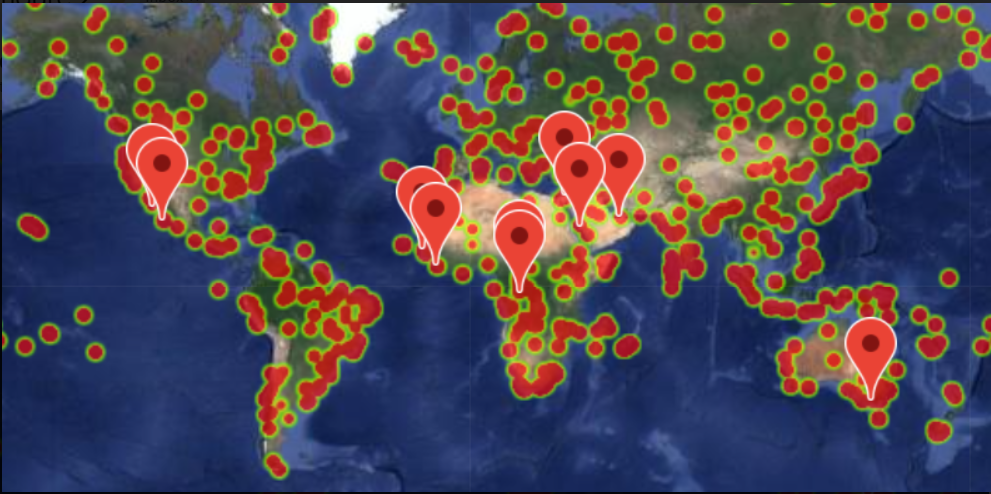

In [ ]:
* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib or Pandas plotting libraries.
* For Part I, you must include a written description of three observable trends based on the data.
* For Part II, you must include a screenshot of the heatmap you create and include it in your submission.
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
* For max intensity in the heat map, try setting it to the highest humidity found in the data set.